**TIME SERIES PROJECT**<br>
Dibuat oleh : Saadillah Noer<br>
Email : saadillahnoer@gmail.com

**Import Libraries**<br>

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

**Read Data**<br>

In [2]:
data_train = pd.read_csv('DJIA 30 Stock.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume,Name
0,2017-01-03,178.83,180.00,177.22,178.05,2510055,MMM
1,2017-01-04,178.03,178.90,177.61,178.32,1541985,MMM
2,2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM
3,2017-01-06,177.29,178.60,175.80,178.23,1625049,MMM
4,2017-01-09,178.37,178.38,177.20,177.27,1622625,MMM


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7781 non-null   object 
 1   Open    7757 non-null   float64
 2   High    7772 non-null   float64
 3   Low     7762 non-null   float64
 4   Close   7781 non-null   float64
 5   Volume  7781 non-null   int64  
 6   Name    7781 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 425.6+ KB


**Mengecek Nilai Hilang dari Isnull**<br>

In [4]:
data_train.isnull().sum()

Date       0
Open      24
High       9
Low       19
Close      0
Volume     0
Name       0
dtype: int64

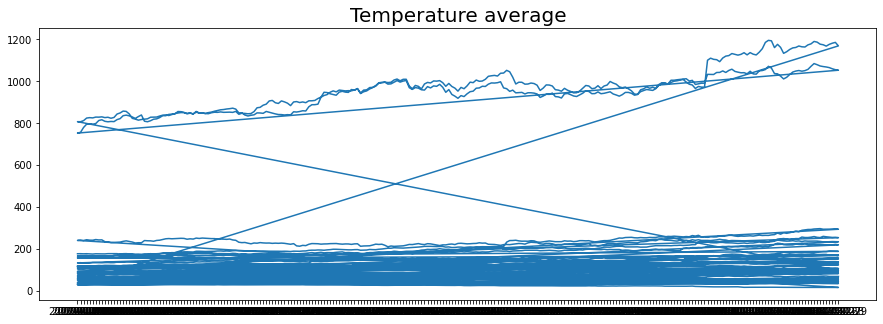

In [10]:
date = data_train['Date'].values
Close = data_train['Close'].values


plt.figure(figsize=(15,5))
plt.plot(date, Close)
plt.title('Temperature average',
          fontsize=20);

In [11]:
data_train['Close'].fillna(data_train['Close'].mean(), inplace=True)

**Split Data**<br>

In [8]:
#Import split data
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(data_train.Close, test_size=0.2, shuffle=False)

print(len(train))
print(len(test))

6224
1557


In [15]:
#Validation Set 
dates = data_train['Date'].values
values  = data_train['Close'].values

x_train, x_test, y_train, y_test = train_test_split(values, dates, test_size = 0.2, shuffle=False)
print()

**Windowed Dataset**<br>

In [29]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w:w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

**Model LSTM & Sequential**<br>

In [30]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
                                    tf.keras.layers.LSTM(60, return_sequences=True),
                                    tf.keras.layers.LSTM(60),
                                    tf.keras.layers.Dense(30, activation="relu"),
                                    tf.keras.layers.Dense(10, activation="relu"),
                                    tf.keras.layers.Dense(1),
])

**Model Learning Rate & Optimizer**<br>

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=10)

Epoch 1/10
62/62 [==============================] - 10s 108ms/step - loss: 46.8481 - mae: 47.3463
Epoch 2/10
62/62 [==============================] - 7s 105ms/step - loss: 46.9489 - mae: 47.4466
Epoch 3/10
62/62 [==============================] - 7s 104ms/step - loss: 46.9633 - mae: 47.4616
Epoch 4/10
62/62 [==============================] - 7s 105ms/step - loss: 46.8768 - mae: 47.3746
Epoch 5/10
62/62 [==============================] - 7s 107ms/step - loss: 46.9818 - mae: 47.4797
Epoch 6/10
62/62 [==============================] - 7s 106ms/step - loss: 46.7810 - mae: 47.2786
Epoch 7/10
62/62 [==============================] - 7s 106ms/step - loss: 46.8941 - mae: 47.3916
Epoch 8/10
62/62 [==============================] - 7s 105ms/step - loss: 46.8609 - mae: 47.3588
Epoch 9/10
62/62 [==============================] - 7s 105ms/step - loss: 46.8462 - mae: 47.3439
Epoch 10/10
62/62 [==============================] - 7s 107ms/step - loss: 46.8251 - mae: 47.3232


**Compare MAE and 10% Scale Data**<br>

In [40]:
minMAE = (data_train['Close'].max() - data_train['Close'].min()) * (10/100)
minMAE

117.84700000000001